In [15]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt


In [16]:
# fonction parcours en profondeur

def dfs(s) :
    P,Q={s :None},[s]
    while Q :
        u = Q[-1]
        R=[y for y in voisinage(u) if y not in P]
       
        if R :
            v=random.choice(R)
            P[v]=u
            Q.append(v)
        else :
            Q.pop()
    return P

In [17]:
def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    
    i, j = couple[0], couple[1]
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
        
    #print(f"fct voisinage : i: {i} j: {j} d: {d} i+d:{i+d} j+d:{j+d}")
    
    return listeVoisins



In [18]:
# Trouver un chemin dans le labyrinthe
def find_path(graph, start, end, path=[]): 
    path = path + [start] 
    if start == end: 
        return path 
    for node in graph[start]: 
        if node not in path: 
            newpath = find_path(graph, node, end, path) 
            if newpath: 
                return newpath 

In [19]:
# Imprimer le labyrinthe
def printLay (labyrinthe):
    plt.imshow(labyrinthe)
     # on cache les graduations:
    plt.xticks([])
    plt.yticks([])
     # on visualise le résultat:
    plt.show()
     #print(labyrinthe)

# une fonction qui permet de convertir le parcous récupéré par 

def convDic (d):
    dic_new = {}
    for i in d.keys():
        dic_new[i] = [d[i]]
        if d[i] in dic_new.keys():
            dic_new[d.get(i)].append(i)
    for i in d.keys():
        dic_new[i] = {node : 1 for node in dic_new[i] if node != None }
    return dic_new

# une fonction qui permcolorier le chemin
def ColerPath (parcours, path): 
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)] 
    
    #print(parcours)
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 3
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 3
            labyrinthe[i+k+1][j+l+1] = 3
            
    for (i,j) in path:
        labyrinthe[2*i+1][2*j+1] = 5
        #if (i,j) in path: 
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 5
            labyrinthe[i+k+1][j+l+1] = 5
    labyrinthe[1][0] = 2
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 5
    return labyrinthe


In [21]:
#Visualisation du graphe avec networkx
def visNx (dic):
    g = nx.Graph()
    for i, j in dic.items():
        for k in j:
            g.add_edge( i,k )
    f, ax = plt.subplots(figsize=(10,5))
    nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

Visualisation labyrinthe  Hauteur: 5 Largeur: 2


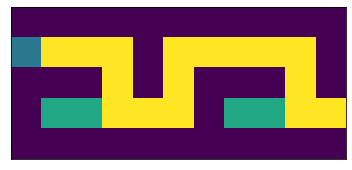

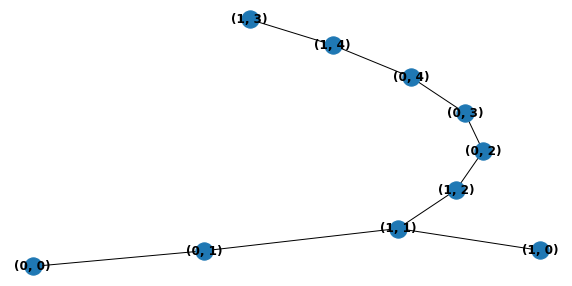

In [31]:
# Dimensions de la grille:
LARGEUR = 5
HAUTEUR = 2

print(f"Visualisation labyrinthe  Hauteur: {LARGEUR} Largeur: {HAUTEUR}")
dic = {(0,0) : None}

parcours = dfs((0,0))

dic = convDic (parcours)

path=find_path(dic, (0, 0), (HAUTEUR-1,LARGEUR-1))

labyrinthe = ColerPath (parcours, path)

printLay (labyrinthe)

visNx (dic)



In [32]:
# function to generate all possible paths 
def find_all_paths(graph, start, end, path =[]): 
    path = path + [start] 
    if start == end: 
        return [path] 
    paths = [] 
    
    for node in graph[start]: 
        if node not in path: 
            newpaths = find_all_paths(graph, node, end, path) 
            for newpath in newpaths: 
                paths.append(newpath) 
            return paths 
    


In [67]:
dic = {(0, 0): {(0, 1): 1},
 (0, 1): {(0, 0): 1, (1, 1): 1},
 (1, 1): {(0, 1): 1, (1, 2): 1, (1, 0): 1},
 (1, 2): {(1, 1): 1, (0, 2): 1, (1, 0) : 1},
 (0, 2): {(1, 2): 1, (0, 3): 1},
 (0, 3): {(0, 2): 1, (0, 4): 1},
 (0, 4): {(0, 3): 1, (1, 4): 1},
 (1, 4): {(0, 4): 1, (1, 3): 1},
 (1, 3): {(1, 4): 1},
 (1, 0): {(1, 1): 1}}

In [64]:
paths

[[(0, 0), (0, 1), (1, 1), (1, 2), (0, 2), (0, 3)],
 [(0, 0), (0, 1), (1, 1), (1, 0), (1, 2), (0, 2), (0, 3)]]

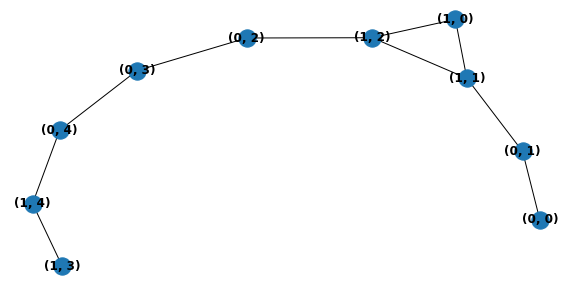

In [68]:
visNx (dic)

In [66]:
print(find_all_paths(dic, (0, 0), (0,3)))

[[(0, 0), (0, 1), (1, 1), (1, 2), (0, 2), (0, 3)]]
